In [1]:
import sys
import time
import exifread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LogNorm

In [46]:
def image_import(image_path):
    image = Image.open(image_path)
    
    exif_file = open(image_path, 'rb')
    tags = exifread.process_file(exif_file, strict = False)
    if "Image Tag 0x8546" in tags.keys():
        print("Successful, found SEM information in image file.")

        # SEM information metadata is a very long binary string and includes data 
        #  that seem to be non decodable ASCII / UTF-8. The information needed is 
        #  in the first 100 characters, so everything after that is ignored.
        stuff = tags["Image Tag 0x8546"]
        stuff_value = stuff.values
        stuff_value = stuff_value[0:100].decode('utf-8')
        stuff_value_list = stuff_value.splitlines()
        
        pixelsize = stuff_value_list[3]
        magnification = stuff_value_list[4]
    else:
        print("Failed, could not find SEM information in image file.")
        sys.exit(0)
    
    return image, image_path, magnification, pixelsize
    
def image_plot(image):
    plt.figure()
    image_array = np.asarray(image)
    plt.imshow(image_array, cmap = 'gray')
    plt.title("SEM Image")
    
def image_fft_numpy(image):
    image_array = np.asarray(image)
    image_array_fft = np.fft.fft2(image_array)
    image_array_fft = np.fft.fftshift(image_array_fft)
    return image_array_fft

def image_fft_plot(image_array_fft):
    plt.figure()
    plt.imshow(np.abs(image_array_fft), norm = LogNorm())
    plt.colorbar()
    plt.title("SEM Image FFT")
    
def main():
    print("Program starts.")
    image_path = "./images/Armin246.tif"
    image, image_path, magnification, pixelsize = image_import(image_path)
    
    image_array_fft = image_fft_numpy(image)

    image_plot(image)
    image_fft_plot(image_array_fft)
    
    return 1

Possibly corrupted field Tag 0x8546 in Image IFD
Program starts.
Successful, found SEM information in image file.


1

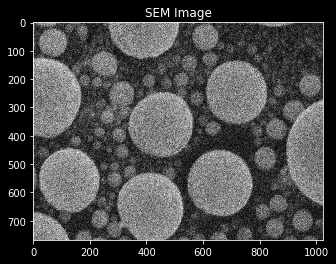

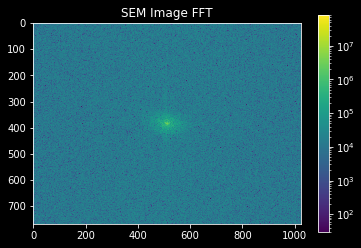

In [47]:
main()